# Final Project - Adult


- Aiden Hai (xhai2)
- Zexi Tracy Chen (zexic7)

## 1. Introduction & Data Overview

We will be analyzing the **Adult Income** [Dataset](https://archive.ics.uci.edu/dataset/2/adult). It contains **48842 records** of adults with **14 features**. Its goal is to predict whether annual income of an individual exceeds $50K/yr based on census data (Also known as "Census Income" dataset).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import RocCurveDisplay

In [2]:
# 1. Load dataset
adult = fetch_ucirepo(id=2) 

# Combine Features and Target into a single DataFrame
X = adult.data.features
y = adult.data.target
df = pd.concat([X, y], axis=1)

In [3]:
# Run this cell so I don't have to fetch the data again
X = adult.data.features 
y = adult.data.targets 
df = pd.concat([X, y], axis=1)

In [ ]:
# 2. Initial Inspection
print(f" Original Dataset Shape: {df.shape}")

print("\n Missing Values Check")
print(df.isnull().sum().sort_values(ascending=False).head(5))
print("\n>>> Target Variable ('income') Distribution")
print(df['income'].value_counts())

print("\n Data Preview")
display(df.head(10))

print("\n Data Info")
df.info()

>>> Original Dataset Shape: (48842, 15)

>>> Missing Values Check
occupation        966
workclass         963
native-country    274
age                 0
fnlwgt              0
dtype: int64

>>> Target Variable ('income') Distribution
income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

>>> Data Preview


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K



>>> Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


**Observations:**

1. **Fix the Target Variable ('income')**: The dataset has 'marked' labels with a dot (e.g., '<=50K.'). We will map them to a binary format (0 for <=50K, 1 for >50K) for consistency.
2. **Handle Missing Values**: Considering that there are ~50000 instances with ~1000 missing values, we will drop rows with missing values (approx. 2% of data, should be fine)
3. We are going to handle the catagorical columes after data cleaning

## Project Scope & Key Questions

In this analysis, we aim to answer one primary prediction question and two secondary inference/structural questions. To achieve this, we will employ a combination of Supervised and Unsupervised Learning methods.

**1. Primary Question (Prediction):**
* **Question:** Can we accurately predict whether an individual's annual income exceeds $50K based on census data?
* **Methods:**
    * **Logistic Regression:** As a baseline linear classifier.
    * **Random Forest:** As a robust non-linear classifier to capture complex interactions.
    * **Evaluation:** We will compare models using **ROC-AUC**, **F1-Score** (due to class imbalance), and **Accuracy**.

**2. Secondary Question 1 (Inference):**
* **Question:** Which demographic features are the most critical determinants of income? Do different models agree on "what matters"?
* **Methods:**
    * **Lasso / Ridge Regression:** Using L1/L2 regularization to penalize and select features.
    * **Feature Importance:** Extracting importance scores from the Random Forest model for comparison.

**3. Secondary Question 2 (Structure):**
* **Question:** Without knowing the income labels, are there natural clusters or patterns in the population? Do these clusters align with income levels?
* **Methods:**
    * **PCA (Principal Component Analysis):** For dimensionality reduction and visualization.
    * **K-Means Clustering:** To discover latent groupings in the data.

## Data Processing

### 1. Data Cleaning

- Handle Target Variable Inconsistencies
- Handle Missing Values

In [5]:
# 3. Data Cleaning
df_clean = df.copy()

# Handle Target Variable Inconsistencies
income_mapping = {
    '<=50K': 0, 
    '<=50K.': 0, 
    '>50K': 1, 
    '>50K.': 1
}

df_clean['income'] = df_clean['income'].map(income_mapping)
print(">>> Target Distribution after Cleaning")
print(df_clean['income'].value_counts())

# Handle Missing Values
print(f"\n>>> Shape before dropping NaNs: {df_clean.shape}")
df_clean = df_clean.dropna()
print(f">>> Shape after dropping NaNs:  {df_clean.shape}")
# Verify no missing values remain
print(f">>> Missing values remaining: {df_clean.isnull().sum().sum()}")

>>> Target Distribution after Cleaning
income
0    37155
1    11687
Name: count, dtype: int64

>>> Shape before dropping NaNs: (48842, 15)
>>> Shape after dropping NaNs:  (47621, 15)
>>> Missing values remaining: 0


In [6]:
# Check Categorical Variables (Unique values) before feature engineering
print("\n=== Unique Values in Categorical Columns ===")
for col in df_clean.select_dtypes(include='object').columns:
    print(f"{col}: {df_clean[col].nunique()} unique values")

# Get distinct values for categorical columns
categorical_cols = df_clean.select_dtypes(include='object').columns
for col in categorical_cols:
    unique_values = df_clean[col].unique()
    print(f"\nDistinct values in '{col}': {unique_values}")



=== Unique Values in Categorical Columns ===
workclass: 9 unique values
education: 16 unique values
marital-status: 7 unique values
occupation: 15 unique values
relationship: 6 unique values
race: 5 unique values
sex: 2 unique values
native-country: 42 unique values

Distinct values in 'workclass': ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Distinct values in 'education': ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Distinct values in 'marital-status': ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Distinct values in 'occupation': ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'


### 2. Initial EDA

- on original features ( use df_clean here because it still has readabble categories like `Occupation`, `Matital-status`)
- before one-hot encoding

/var/folders/d_/f3w5b1yn2_vd6lfw2ly0b8sc0000gn/T/ipykernel_67050/3029743141.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income',


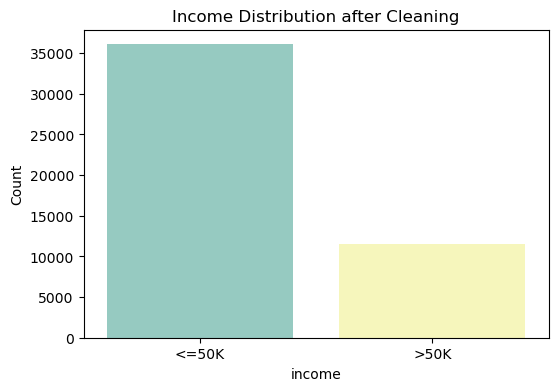

>>> Correlation Matrix:
                 age  fnlwgt  education-num  capital-gain  capital-loss  \
age             1.00   -0.08           0.03          0.08          0.06   
fnlwgt         -0.08    1.00          -0.04         -0.00         -0.00   
education-num   0.03   -0.04           1.00          0.13          0.08   
capital-gain    0.08   -0.00           0.13          1.00         -0.03   
capital-loss    0.06   -0.00           0.08         -0.03          1.00   
hours-per-week  0.08   -0.02           0.14          0.08          0.06   
income          0.23   -0.01           0.33          0.22          0.15   

                hours-per-week  income  
age                       0.08    0.23  
fnlwgt                   -0.02   -0.01  
education-num             0.14    0.33  
capital-gain              0.08    0.22  
capital-loss              0.06    0.15  
hours-per-week            1.00    0.23  
income                    0.23    1.00  


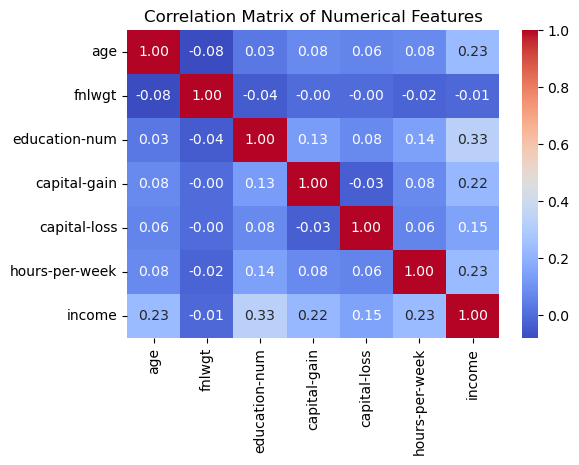

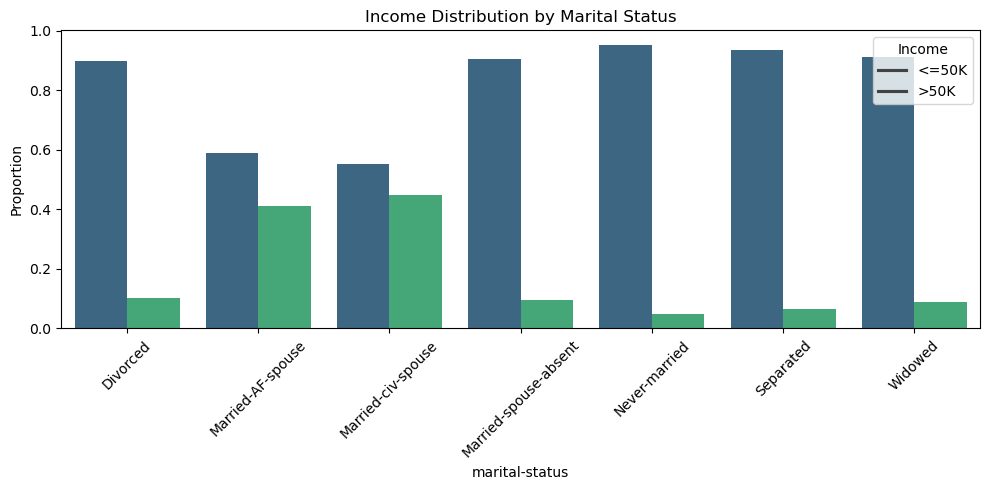

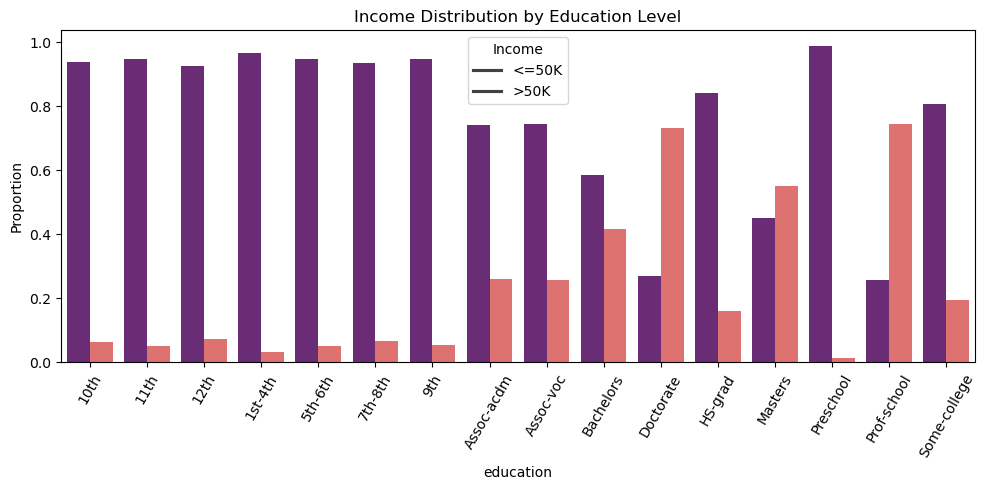

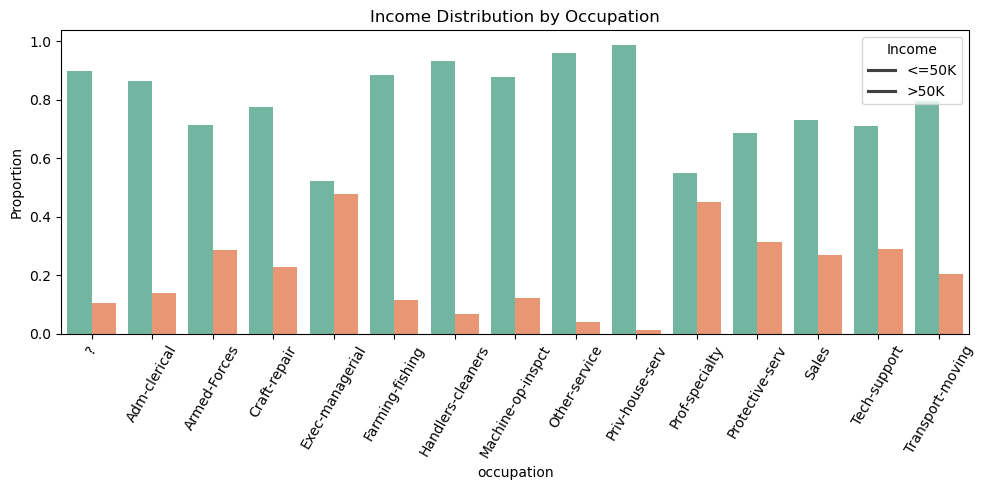

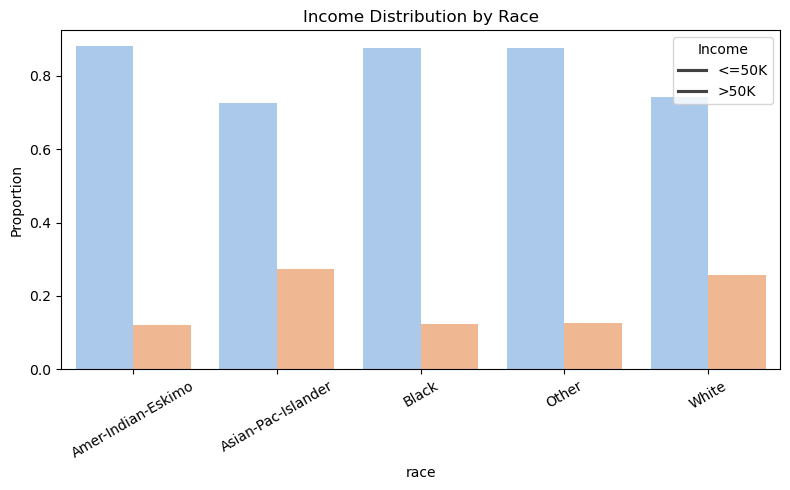

In [7]:
# 0. Target Variable Distribution after Cleaning
plt.figure(figsize=(6,4))
sns.countplot(x='income', 
              data=df_clean, 
              palette='Set3', 
              order=[0, 1])
plt.title('Income Distribution after Cleaning')
plt.xticks(ticks=[0,1], labels=['<=50K', '>50K'])
plt.ylabel('Count')
plt.show()

# 1. Numerical Correlation Matrix
# Select only numerical columns for correlation analysis
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df_clean[numeric_cols].corr()
# Round to 2 decimal places for better readability
corr_matrix = corr_matrix.round(2)
print(f">>> Correlation Matrix:\n{corr_matrix}")

# Visualize Correlation Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 2. Categorical Analysis: Income Distribution by Marital Status
# This helps us visualize the relationship between categorical features and the target
plt.figure(figsize=(10, 5))
# We normalize to see the *proportion* of high income earners in each group
prop_df = (df_clean.groupby('marital-status')['income']
           .value_counts(normalize=True)
           .rename('proportion')
           .reset_index())

sns.barplot(x='marital-status', y='proportion', hue='income', data=prop_df, palette='viridis')
plt.title('Income Distribution by Marital Status')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Income', labels=['<=50K', '>50K']) # 0 is <=50K, 1 is >50K
plt.tight_layout()
plt.show()

# Categorical Analysis: Income Distribution by Education Level (perhaps the last time we see education)
plt.figure(figsize=(10, 5))
prop_df_edu = (df_clean.groupby('education')['income']
               .value_counts(normalize=True)
               .rename('proportion')
               .reset_index())
sns.barplot(x='education', y='proportion', hue='income', data=prop_df_edu, palette='magma')
plt.title('Income Distribution by Education Level')
plt.ylabel('Proportion')
plt.xticks(rotation=60)
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.tight_layout()
plt.show()

# Categorical Analysis: Income Distribution by Occupation
plt.figure(figsize=(10, 5))
prop_df_occ = (df_clean.groupby('occupation')['income']
                .value_counts(normalize=True)
                .rename('proportion')
                .reset_index())
sns.barplot(x='occupation', y='proportion', hue='income', data=prop_df_occ, palette='Set2')
plt.title('Income Distribution by Occupation')
plt.ylabel('Proportion')
plt.xticks(rotation=60)
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.tight_layout()
plt.show()

# Categorical Analysis: Income Distribution by race
plt.figure(figsize=(8, 5))
prop_df_race = (df_clean.groupby('race')['income']
                .value_counts(normalize=True)
                .rename('proportion')
                .reset_index())
sns.barplot(x='race', y='proportion', hue='income', data=prop_df_race, palette='pastel')
plt.title('Income Distribution by Race')
plt.ylabel('Proportion')
plt.xticks(rotation=30)
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.tight_layout()
plt.show()

**Observation:**

- Numerical Analysis: 
  - `education-num` shows the strongest positive correlation with income (0.33). 
  - `age` and `hours-per-week` share the second spot, both with a correlation of 0.23. 
  - `fnlwgt` has a correlation of nearly zero (-0.01). It might be a statistical artifact of the census sampling process and holds no predictive power for our classification task.
  - We have every reason to expect that in subsequent models (such as Lasso or Random Forest), education-num will rank near the top while fnlwgt will rank near the bottom.
  - There is no sign of strong multicollinearity between the features (highest is only ~0.14 between `education` and `hours`), suggesting that these numerical features provide independent information to the model.
- Categorical Analysis:
  - Marital Status is a highly discriminatory feature. The `Married-civ-spouse` and `Married-AF-spouse` group has dramatically higher proportion of high-income earners compared to those **"Single"** groups
  - For Education years, holders of Masters and Doctorate degrees have the highest probability of earning $>50K$. Human capital should be a primary driver of income in this dataset.
  - Income varies significantly by occupation. `Exec-managerial` and `Prof-specialty` roles have the highest concentration of high earners, whereas service and manual labor roles (`Priv-house-serv`, `Other-service`) are predominantly in the lower income bracket.

### 3. Feature Engineering

Before feeding the data into machine learning models, we need to perform Feature Engineering to translate "human-readable" features into "machine-readable" numbers. Here is our plan:

1.  **Handle Hidden Missing Values ('?'):** We noticed values like `'?'` in `workclass` and `occupation`. These are effectively missing values. We will drop these rows to maintain data integrity.
2.  **Remove Redundancy:** The `education` column is actually a similar label for `education-num`. Since `education-num` already captures the ordinal nature of education (e.g., Masters > Bachelors), we will drop the text column to avoid duplicate information.
3.  **Reduce High Cardinality (Native Country):** There are 42 distinct countries, but the vast majority (~90%) are 'United-States'. Creating 40+ columns for rare countries would introduce noise (Curse of Dimensionality). We will create a new binary feature `is_usa` (1 for US, 0 for Non-US).
4.  **Binary Encoding (Sex):** We will map `Male` to 1 and `Female` to 0.
5.  **One-Hot Encoding:** For the remaining categorical variables (Workclass, Marital Status, Occupation, Relationship, Race), we will use One-Hot Encoding (with `drop_first=True`) to convert them into numerical dummy variables.
   
**Why One-Hot Encoding?**
- **Reason:** Most algorithms (Logistic Regression, Lasso, PCA) perform mathematical operations (matrix multiplication, distance calculation) and cannot process text (e.g., "Married", "Divorced").
- **Why not label encoding (1, 2, 3)?** Assigning numbers like *Married=1, Divorced=2* implies an order ($2 > 1$) that doesn't exist. One-Hot Encoding creates binary columns (0/1) to treat each category equally and independently.

**We will do Scaling later. Why Scaling (Standardization)?**
- Our features have vastly different ranges. `Age` ranges from 17-90, while `Capital Gain` ranges from 0-99999.
- **Impact on Lasso/Ridge:** These models penalize the *magnitude* of coefficients. If a feature has a huge scale (like Capital Gain), its coefficient will be naturally small, and Lasso might unfairly punish it or fail to converge properly.
- **Impact on PCA & Clustering:** These methods depend on **variance** and **distance**. Features with large numbers (Capital Gain) will dominate the variance calculations, rendering features with smaller scales (like Age) insignificant.
- **Solution:** We will use `StandardScaler` to force all numerical features to have a mean of 0 and a variance of 1.

In [8]:
# 4. Feature Engineering
df_fe = df_clean.copy()

# Handle Hidden Missing Values ('?')
df_fe.replace('?', np.nan, inplace=True)
print(f">>> Shape before dropping '?': {df_fe.shape}")
df_fe = df_fe.dropna()
print(f">>> Shape after dropping '?':  {df_fe.shape}")

# Drop Redundant Feature. We prefer 'education-num' because it is numerical and ordinal.
if 'education' in df_fe.columns:
    df_fe = df_fe.drop('education', axis=1)
    print("\n>>> Dropped 'education' column in favor of 'education-num'.")

# Simplify 'native-country' -> 'native-country-usa' (1 if USA, 0 otherwise)
df_fe['native-country-usa'] = df_fe['native-country'].apply(lambda x: 1 if x == 'United-States' else 0)
df_fe = df_fe.drop('native-country', axis=1) # Drop the original column
print("\n>>> Created binary 'native-country-usa' feature and dropped 'native-country'.")

# Binary Mapping for 'sex'
df_fe['sex'] = df_fe['sex'].map({'Male': 1, 'Female': 0})
print("\n>>> Sex column mapped to binary values.")

# One-Hot Encoding, Convert remaining categorical variables into dummy/indicator variables
# drop_first=True to avoid multicollinearity (Crucial for Logistic Regression)
df_encoded = pd.get_dummies(df_fe, drop_first=True, dtype=int)
print("\n>>> One-Hot Encoding applied to categorical variables.")

print(f"\n>>> Final Dataset Shape: {df_encoded.shape}")
print("\n>>> First 10 rows of Encoded Data:")
display(df_encoded.head(10))

print("\n>>> Final Data Info:")
df_encoded.info()

>>> Shape before dropping '?': (47621, 15)
>>> Shape after dropping '?':  (45222, 15)

>>> Dropped 'education' column in favor of 'education-num'.

>>> Created binary 'native-country-usa' feature and dropped 'native-country'.

>>> Sex column mapped to binary values.

>>> One-Hot Encoding applied to categorical variables.

>>> Final Dataset Shape: (45222, 43)

>>> First 10 rows of Encoded Data:


,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,income,native-country-usa,workclass_Local-gov,...,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,77516,13,1,2174,0,40,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,50,83311,13,1,0,0,13,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,38,215646,9,1,0,0,40,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,53,234721,7,1,0,0,40,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,0,40,0,0,0,...,0,0,0,0,0,1,0,1,0,0
5,37,284582,14,0,0,0,40,0,1,0,...,0,0,0,0,0,1,0,0,0,1
6,49,160187,5,0,0,0,16,0,0,0,...,0,1,0,0,0,0,0,1,0,0
7,52,209642,9,1,0,0,45,1,1,0,...,0,0,0,0,0,0,0,0,0,1
8,31,45781,14,0,14084,0,50,1,1,0,...,0,1,0,0,0,0,0,0,0,1
9,42,159449,13,1,5178,0,40,1,1,0,...,0,0,0,0,0,0,0,0,0,1



>>> Final Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 43 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   45222 non-null  int64
 1   fnlwgt                                45222 non-null  int64
 2   education-num                         45222 non-null  int64
 3   sex                                   45222 non-null  int64
 4   capital-gain                          45222 non-null  int64
 5   capital-loss                          45222 non-null  int64
 6   hours-per-week                        45222 non-null  int64
 7   income                                45222 non-null  int64
 8   native-country-usa                    45222 non-null  int64
 9   workclass_Local-gov                   45222 non-null  int64
 10  workclass_Private                     45222 non-null  int64
 11  workclass_Self-emp-inc  

### 4. Train-Test Split

Before exploring the data or training models, we must split our dataset into a **Training Set (70%)** and a **Testing Set (30%)**.

In [ ]:
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6657, stratify=y)

print(f" X_train shape: {X_train.shape}")
print(f" X_test shape:  {X_test.shape}")
print(f" y_train distribution:\n{y_train.value_counts(normalize=True)}")

>>> X_train shape: (31655, 42)
>>> X_test shape:  (13567, 42)
>>> y_train distribution:
income
0    0.75214
1    0.24786
Name: proportion, dtype: float64


### 5. Exploratory Data Analysis (EDA, phase 2)

*Note: We perform EDA exclusively on the **Training Set** to avoid "Data Snooping" bias.*

>>> Top Correlations with Income:
marital-status_Married-civ-spouse    0.446534
education-num                        0.329122
age                                  0.233738
hours-per-week                       0.228201
capital-gain                         0.219239
occupation_Exec-managerial           0.215898
sex                                  0.213056
occupation_Prof-specialty            0.184330
capital-loss                         0.147918
occupation_Machine-op-inspct        -0.074828
relationship_Other-relative         -0.085707
occupation_Handlers-cleaners        -0.089873
race_Black                          -0.090393
workclass_Private                   -0.116804
relationship_Unmarried              -0.142584
occupation_Other-service            -0.166257
relationship_Not-in-family          -0.198074
relationship_Own-child              -0.222614
marital-status_Never-married        -0.319632
Name: income, dtype: float64


/var/folders/d_/f3w5b1yn2_vd6lfw2ly0b8sc0000gn/T/ipykernel_67050/769894636.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')


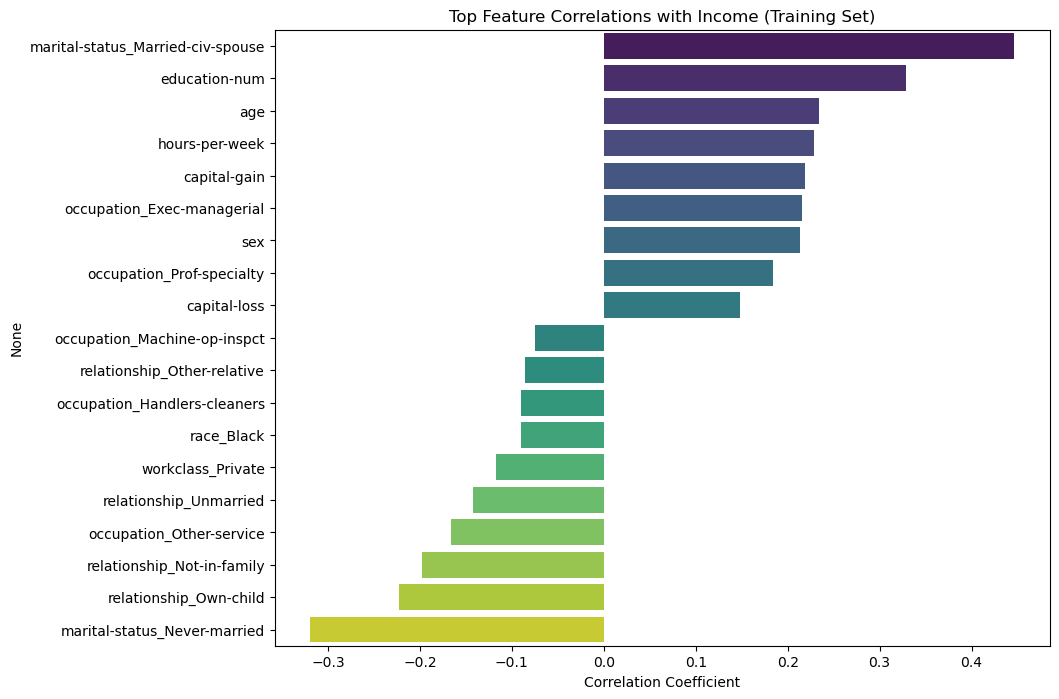

/var/folders/d_/f3w5b1yn2_vd6lfw2ly0b8sc0000gn/T/ipykernel_67050/769894636.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='age', data=df_train, ax=axes[0], palette='Set2')
/var/folders/d_/f3w5b1yn2_vd6lfw2ly0b8sc0000gn/T/ipykernel_67050/769894636.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='education-num', data=df_train, ax=axes[1], palette='Set2')
/var/folders/d_/f3w5b1yn2_vd6lfw2ly0b8sc0000gn/T/ipykernel_67050/769894636.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='hours-per-

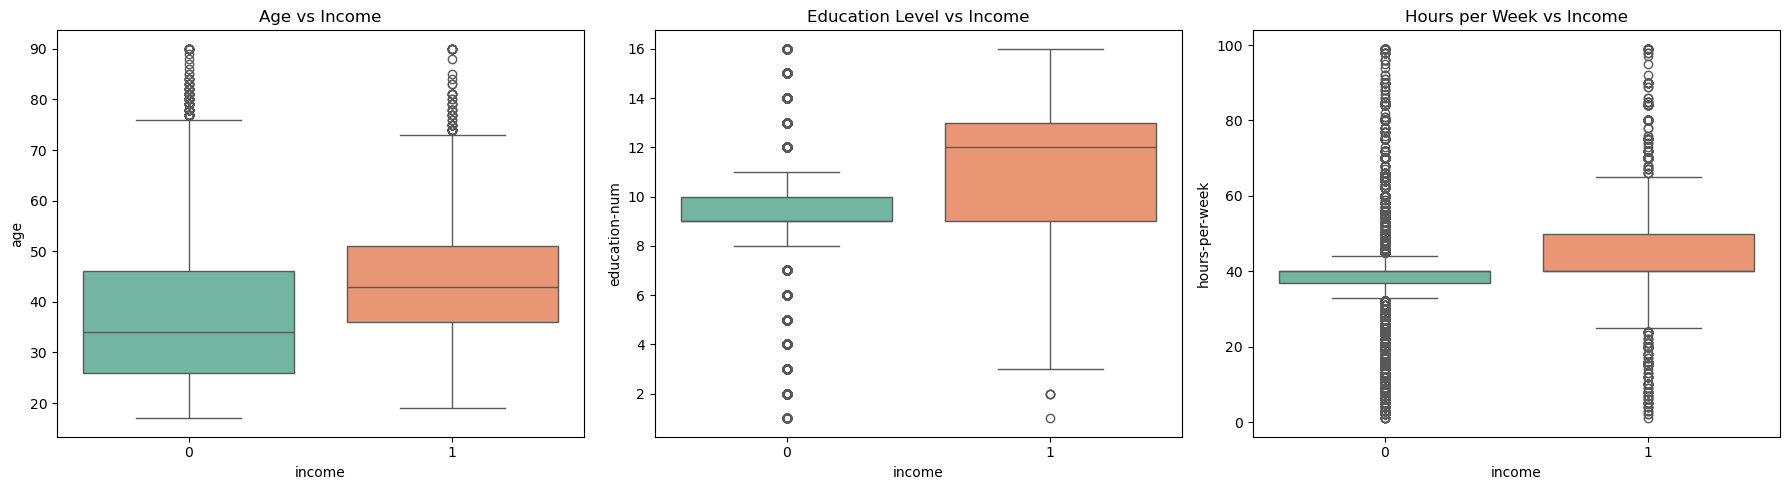

In [10]:
# Create a temporary dataframe for EDA (combining X_train and y_train)
df_train = X_train.copy()
df_train['income'] = y_train

# A. Correlation Analysis (might help answering SQ1: What matters?)
plt.figure(figsize=(10, 8))

# Calculate correlation of all features with 'income'
correlations = df_train.corr()['income'].sort_values(ascending=False)

# Drop 'income' itself from the list and take top 10 and bottom 10
top_corr = pd.concat([correlations.head(10), correlations.tail(10)])
top_corr = top_corr.drop('income') # Remove self-correlation

print(f">>> Top Correlations with Income:\n{top_corr}")

# Plot Bar Chart
sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')
plt.title('Top Feature Correlations with Income (Training Set)')
plt.xlabel('Correlation Coefficient')
plt.show()

# B. Numerical Distributions (Boxplots)
# We check 3 key numerical features: Age, Education-Num, Hours-per-week. These are often important predictors.
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x='income', y='age', data=df_train, ax=axes[0], palette='Set2')
axes[0].set_title('Age vs Income')

sns.boxplot(x='income', y='education-num', data=df_train, ax=axes[1], palette='Set2')
axes[1].set_title('Education Level vs Income')

sns.boxplot(x='income', y='hours-per-week', data=df_train, ax=axes[2], palette='Set2')
axes[2].set_title('Hours per Week vs Income')

plt.tight_layout()
plt.show()

**Observation:**

- Correlation Analysis
  - The data shows that Married-civ-spouse has the strongest positive correlation with high income (+0.45), while Never-married has the strongest negative correlation (-0.32). This suggests that marital status is the single most powerful linear predictor in our dataset.
  - Education-num (+0.33) and Age (+0.23) follow closely behind, confirming that higher education and seniority are key drivers of wealth.
  - *We will later compare these linear correlations with Lasso and Random Forest Feature Importance to see if non-linear models also identify these as the most critical features.*

- Boxplots Analysis (Age, Education, Hours)
  - The boxplots confirm our correlation findings. The high-income group (`>50K`) is distinctly older (median age ~45 vs 34), has more years of education, and tends to work longer hours compared to the lower-income group.


## Project Scope & Key Questions

In this analysis, we aim to answer one primary prediction question and two secondary inference/structural questions. To achieve this, we will employ a combination of Supervised and Unsupervised Learning methods.

**1. Primary Question (Prediction):**
* **Question:** Can we accurately predict whether an individual's annual income exceeds $50K based on census data?
* **Methods:**
    * **Logistic Regression:** As a baseline linear classifier.
    * **Random Forest:** As a robust non-linear classifier to capture complex interactions.
    * **Evaluation:** We will compare models using **ROC-AUC**, **F1-Score** (due to class imbalance), and **Accuracy**.

**2. Secondary Question 1 (Inference):**
* **Question:** Which demographic features are the most critical determinants of income? Do different models agree on "what matters"?
* **Methods:**
    * **Lasso / Ridge Regression:** Using L1/L2 regularization to penalize and select features.
    * **Feature Importance:** Extracting importance scores from the Random Forest model for comparison.

**3. Secondary Question 2 (Structure):**
* **Question:** Without knowing the income labels, are there natural clusters or patterns in the population? Do these clusters align with income levels?
* **Methods:**
    * **PCA (Principal Component Analysis):** For dimensionality reduction and visualization.
    * **K-Means Clustering:** To discover latent groupings in the data.


---

## Primary Question: Prediction & Model Comparison

**Question:** Can we accurately predict whether an individual's annual income exceeds $50K based on census data?

**Methodology:**
To answer this, we will train and compare two distinct types of models:
1.  **Logistic Regression:** A linear baseline model that is easy to interpret but assumes linear relationships.
2.  **Random Forest:** A non-linear ensemble method that can capture complex interactions between features (e.g., Age + Education).

**Evaluation Metrics:**
Since our dataset is imbalanced (~75% are <=50K), **Accuracy** alone can be misleading. We will prioritize **ROC-AUC** (Area Under the Receiver Operating Characteristic Curve) to measure the model's ability to distinguish between classes, along with **F1-Score**.

>>> Data Scaled successfully.
>>> Logistic Regression trained.
>>> Random Forest trained.

       PRIMARY QUESTION RESULTS       

[Logistic Regression]
Accuracy: 0.8512
ROC-AUC:  0.9055
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90     10205
        >50K       0.74      0.62      0.67      3362

    accuracy                           0.85     13567
   macro avg       0.81      0.77      0.79     13567
weighted avg       0.85      0.85      0.85     13567


[Random Forest]
Accuracy: 0.8535
ROC-AUC:  0.9057
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90     10205
        >50K       0.74      0.63      0.68      3362

    accuracy                           0.85     13567
   macro avg       0.81      0.78      0.79     13567
weighted avg       0.85      0.85      0.85     13567


>>> Confusion Matrices:
Logistic Regression Confusion Matrix:

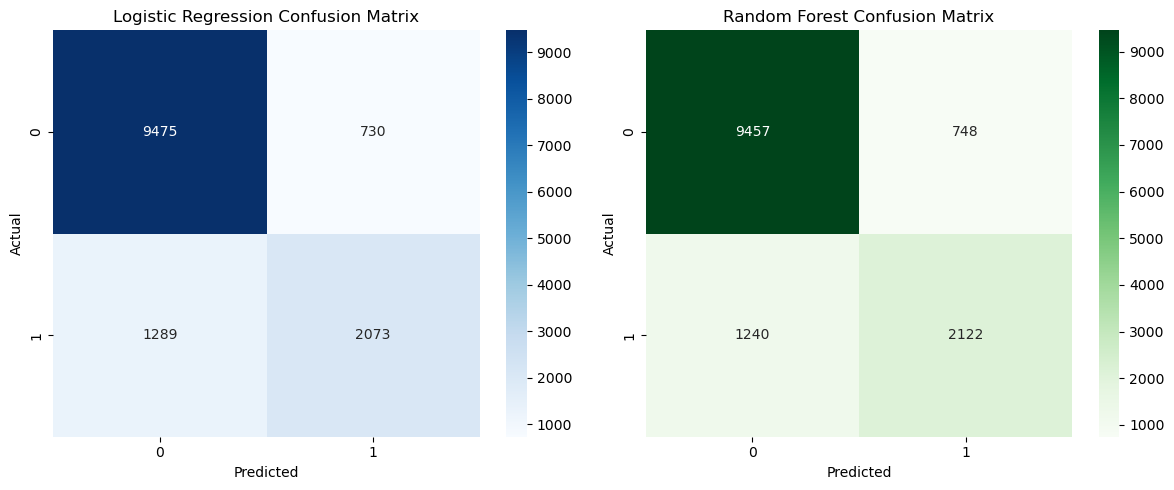

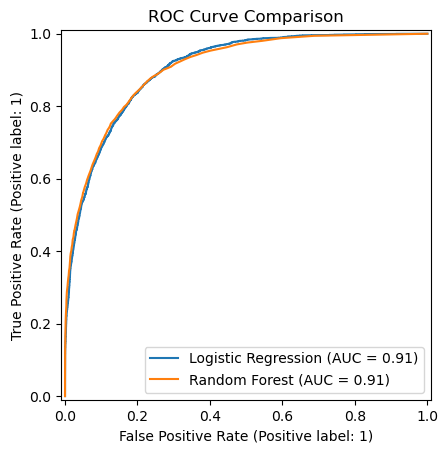

----------------------------------------
>>> Random Forest outperforms Logistic Regression.


In [11]:
# Step 1: Feature Scaling (Crucial for Logistic Regression)
# We fit the scaler on the Training set only to prevent data leakage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(">>> Data Scaled successfully.")

# Step 2: Model Training

# Model A: Logistic Regression (The Baseline)
# We use max_iter=1000 to ensure the solver converges
log_reg = LogisticRegression(random_state=6657, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
print(">>> Logistic Regression trained.")

# Model B: Random Forest (The Challenger)
# n_estimators=100 is a standard starting point
rf_model = RandomForestClassifier(n_estimators=100, random_state=6657)
rf_model.fit(X_train_scaled, y_train) # RF can handle unscaled data, but using scaled is fine too
print(">>> Random Forest trained.")

# Step 3: Evaluation (Answering the Primary Question)

# Generate Predictions
y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate Metrics
print("\n" + "="*40)
print("       PRIMARY QUESTION RESULTS       ")
print("="*40)

# Logistic Regression Results
print("\n[Logistic Regression]")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"ROC-AUC:  {roc_auc_score(y_test, y_prob_lr):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['<=50K', '>50K']))

# Random Forest Results
print("\n[Random Forest]")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"ROC-AUC:  {roc_auc_score(y_test, y_prob_rf):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['<=50K', '>50K']))

# Confusion Matrix Plot
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("\n>>> Confusion Matrices:")
print("Logistic Regression Confusion Matrix:\n", cm_lr)
print("Random Forest Confusion Matrix:\n", cm_rf)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()

# make the roc curve plots

RocCurveDisplay.from_estimator(log_reg, X_test_scaled, y_test, ax=plt.gca(), name="Logistic Regression")
RocCurveDisplay.from_estimator(rf_model, X_test_scaled, y_test, ax=plt.gca(), name="Random Forest")
plt.title("ROC Curve Comparison")
plt.show()

# Quick Conclusion Print
print("-" * 40)
if roc_auc_score(y_test, y_prob_rf) > roc_auc_score(y_test, y_prob_lr):
    print(">>> Random Forest outperforms Logistic Regression.")
else:
    print(">>> Logistic Regression performs better than Random Forest.")

In [12]:
# Find a best random forest number of estimators
n_estimators_options = [2, 5, 10, 20, 50, 100]
rf_aucs = []
for n in n_estimators_options:
    rf_temp = RandomForestClassifier(n_estimators=n, random_state=6657)
    rf_temp.fit(X_train_scaled, y_train)
    y_prob_temp = rf_temp.predict_proba(X_test_scaled)[:, 1]
    auc = roc_auc_score(y_test, y_prob_temp)
    rf_aucs.append(auc)
    print(f">>> Random Forest with {n} estimators: ROC-AUC = {auc:.4f}")

# best n_estimators
best_n = n_estimators_options[np.argmax(rf_aucs)]
best_rf_model = RandomForestClassifier(n_estimators=best_n, random_state=6657)
best_rf_model.fit(X_train_scaled, y_train)

>>> Random Forest with 2 estimators: ROC-AUC = 0.8004
>>> Random Forest with 5 estimators: ROC-AUC = 0.8571
>>> Random Forest with 10 estimators: ROC-AUC = 0.8834
>>> Random Forest with 20 estimators: ROC-AUC = 0.8957
>>> Random Forest with 50 estimators: ROC-AUC = 0.9034
>>> Random Forest with 100 estimators: ROC-AUC = 0.9057


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


**Observation:**

- **A Tight Race**
  - The performance of both models is remarkably similar. **Accuracy hovers around 85%**, and **ROC-AUC is approximately 0.905**. 
  - This indicates that an AUC of 0.90 is an exceptionally strong result, demonstrating that our feature engineering (especially `marital-status` and `education`) is highly effective—even a simple linear model (LR) can learn well.
- **Random Forest Wins by a Nose**
  - Despite the close scores, **Random Forest (RF)** performed marginally better.
  - RF achieved an F1 score of **0.68** when predicting `>50K` (high-income individuals), slightly higher than LR's **0.67**.
  - Examining the bottom-right corner (True Positives) of the **Confusion Matrix**, RF correctly identified **2122** high-income individuals, while LR identified **2073**. RF captured an additional **49** affluent individuals, accounting for its narrow victory.
- **Conclusion**
  - Although Logistic Regression performs exceptionally well as a simple baseline, we selected **Random Forest** (n_estimators=100) as the optimal model to enhance detection accuracy for the high-income minority group.



---

## Secondary Question 1: Feature Importance & Inference

**Question:** Which demographic features are the most critical determinants of income? Do different models agree on "what matters"?

**Methodology:**
To answer this, we need to inspect the internal parameters of our models. We will compare two different perspectives:

1.  **Lasso Regression (L1 Regularization):** By applying an L1 penalty, Lasso shrinks the coefficients of less important features to zero. The magnitude and sign (+/-) of the coefficients tell us **directionality** (e.g., does marriage *increase* or *decrease* the probability of high income?).
2.  **Random Forest Feature Importance:** This measures how much each feature decreases the weighted impurity (Gini impurity) across all trees. It captures **non-linear importance** and interactions but does not provide directionality.

**Goal:**
We expect **Marital Status**, **Age**, and **Education** to be top predictors. We want to see if Lasso (Linear) and Random Forest (Non-Linear) identify the same key drivers.

>>> Lasso Model (L1) trained for feature selection.


/var/folders/d_/f3w5b1yn2_vd6lfw2ly0b8sc0000gn/T/ipykernel_67050/1814744261.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=top_lasso, palette='coolwarm', ax=axes[0])
/var/folders/d_/f3w5b1yn2_vd6lfw2ly0b8sc0000gn/T/ipykernel_67050/1814744261.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rf_importances.head(10), palette='viridis', ax=axes[1])


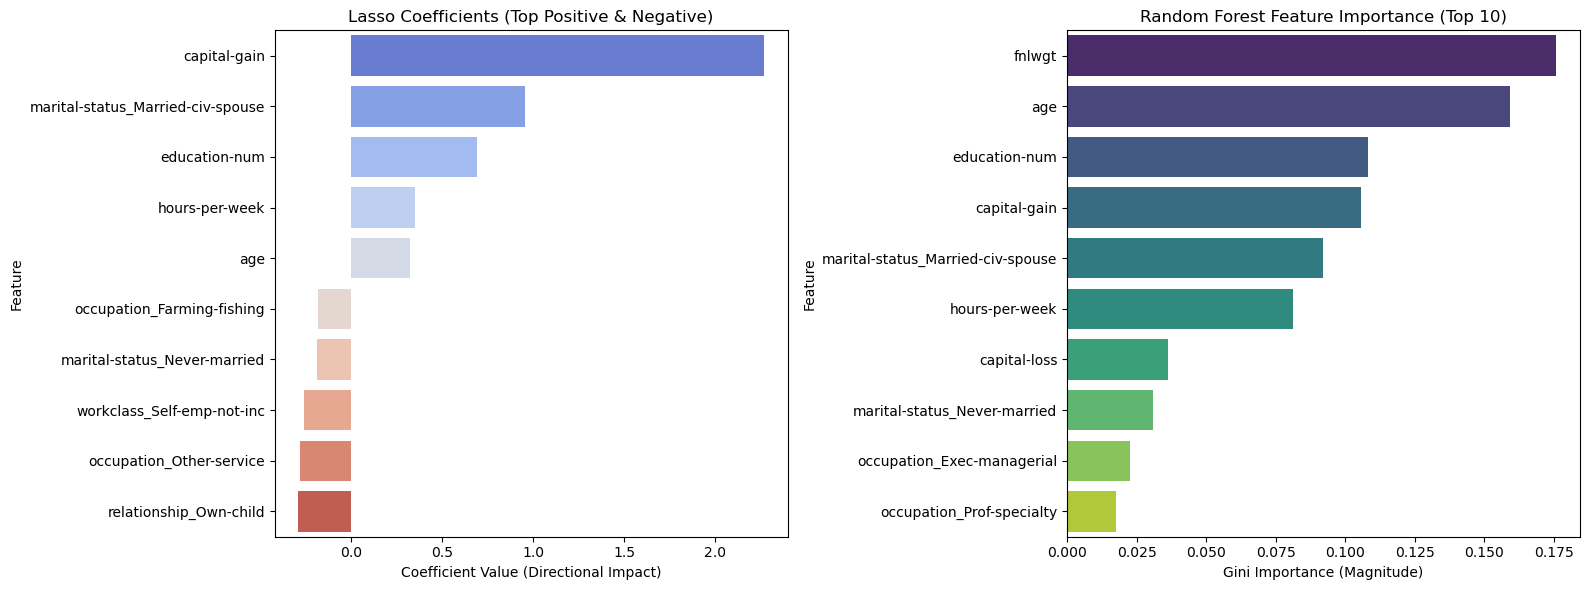


     SECONDARY QUESTION 1 RESULTS     

>>> Top 5 Features increasing Income (Lasso):
                          Feature  Coefficient
                     capital-gain     2.269355
marital-status_Married-civ-spouse     0.955407
                    education-num     0.690841
                   hours-per-week     0.348430
                              age     0.321129

>>> Top 5 Features decreasing Income (Lasso):
                     Feature  Coefficient
      relationship_Own-child    -0.292117
    occupation_Other-service    -0.278259
  workclass_Self-emp-not-inc    -0.257475
marital-status_Never-married    -0.186462
  occupation_Farming-fishing    -0.181802

>>> Top 5 Important Features (Random Forest):
                          Feature  Importance
                           fnlwgt    0.175721
                              age    0.159294
                    education-num    0.108292
                     capital-gain    0.105690
marital-status_Married-civ-spouse    0.092131


In [16]:
# Step 1: Train Lasso for Feature Selection
# We use Logistic Regression with L1 penalty to enforce sparsity (Feature Selection)
# solver='liblinear' is required for L1 penalty
lasso_model = LogisticRegression(penalty='l1', C=0.1, solver='liblinear', random_state=6657)
lasso_model.fit(X_train_scaled, y_train)

print(">>> Lasso Model (L1) trained for feature selection.")

# Step 2: Extract Feature Importance
# A. Lasso Coefficients
lasso_coefs = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# B. Random Forest Importances (Using the model trained in Primary Question)
rf_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Step 3: Visualization & Comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Top 10 Positive/Negative Lasso Coefficients
# We take top 5 positive and bottom 5 negative to see the contrast
top_lasso = pd.concat([lasso_coefs.head(5), lasso_coefs.tail(5)])
sns.barplot(x='Coefficient', y='Feature', data=top_lasso, palette='coolwarm', ax=axes[0])
axes[0].set_title('Lasso Coefficients (Top Positive & Negative)')
axes[0].set_xlabel('Coefficient Value (Directional Impact)')

# Plot Top 10 Random Forest Features
sns.barplot(x='Importance', y='Feature', data=rf_importances.head(10), palette='viridis', ax=axes[1])
axes[1].set_title('Random Forest Feature Importance (Top 10)')
axes[1].set_xlabel('Gini Importance (Magnitude)')

plt.tight_layout()
plt.show()

# Step 4: Textual Analysis of Results
print("\n" + "="*40)
print("     SECONDARY QUESTION 1 RESULTS     ")
print("="*40)

print("\n>>> Top 5 Features increasing Income (Lasso):")
print(lasso_coefs.head(5).to_string(index=False))

print("\n>>> Top 5 Features decreasing Income (Lasso):")
print(lasso_coefs.tail(5).sort_values(by='Coefficient').to_string(index=False))

print("\n>>> Top 5 Important Features (Random Forest):")
print(rf_importances.head(5).to_string(index=False))

**Simple Analysis (Observation):**

- **Lasso (The Rational Critic):** Lasso's results align strongly with economic intuition.
  - `Capital Gain` (2.27) is the strongest positive indicator (which is why Lasso ranks it first, as it probably directly represents money).
  - `Married-civ-spouse` (0.96) and `Education-num` (0.69) form the second tier, confirming the importance of marital stability and educational attainment.
  - **Negative Drivers:** `Own-child` (having children) and `Other-service` (low-end service sector) significantly reduce the probability of high income.
  - They also align with the results we found in Correlation Analysis at EDA (phase 2)
- **Random Forest (The “Noise” Trap ):**
  - I Note RF's top feature: `fnlwgt` (0.17). Our earlier EDA heatmap showed `fnlwgt`'s correlation with income is nearly **zero**. 
  - This is probably a known bias in the Random Forest algorithm. RF tends to favor features with **high cardinality and many unique values** (as they allow for more splitting). Since `fnlwgt` has a different value for each person, RF mistakenly deems it useful, but this is actually **overfitting noise**.
- **Comparison:** Lasso is smarter, as it wasn't fooled by `fnlwgt` (which didn't make the top 5) and instead captured `capital-gain`.
- **Conclusion:** This proves why we need to compare multiple models. Lasso is more "honest" in feature selection than an unoptimized RF.


## Secondary Question 2: Unsupervised Structure

**Question:** Without using the income labels, can we discover natural groupings or structures in the data? Do these "hidden" structures align with our income classes?

**Methodology:**
Since the dataset has 40+ dimensions after One-Hot Encoding, it is impossible to visualize directly. We will use:
1.  **PCA (Principal Component Analysis):** To compress the data into 2 dimensions and visualize if the two income classes are linearly separable in the latent space.
2.  **K-Means Clustering:** To group similar individuals into clusters based on their features alone. We will then check if specific clusters contain a disproportionate amount of high-income individuals.

**Hypothesis:**
We expect to see some separation in PCA, but likely a lot of overlap. We also expect K-Means to find a "High Socio-Economic Status" cluster (e.g., older, married, educated) that naturally captures the high-income group.

/var/folders/d_/f3w5b1yn2_vd6lfw2ly0b8sc0000gn/T/ipykernel_67050/2380168967.py:25: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(*scatter.legend_elements(), title="Income", labels=['<=50K', '>50K'])


>>> Explained Variance by PC1 & PC2: 12.95%

>>> PCA Loadings (Top 5 for PC1):
marital-status_Married-civ-spouse    0.436743
age                                  0.302961
sex                                  0.253963
hours-per-week                       0.239313
workclass_Self-emp-not-inc           0.180514

>>> PCA Loadings (Top 5 for PC2):
race_White                 0.414097
sex                        0.281983
workclass_Private          0.270104
relationship_Own-child     0.212134
occupation_Craft-repair    0.166891


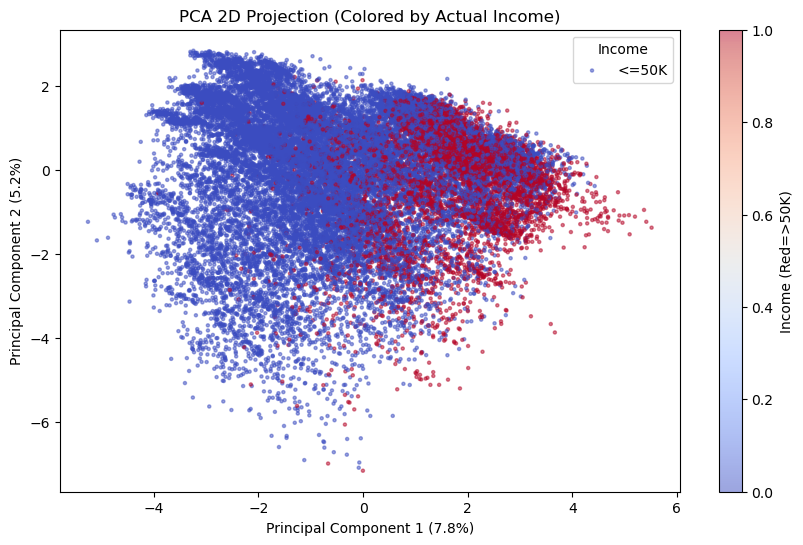


     SECONDARY QUESTION 2 RESULTS     

>>> Percentage of High Income Earners (>50K) per Cluster:
Cluster
0    0.075177
1    0.056634
2    0.449947

>>> Cluster Profiles (Mean Values of Key Features):
               age  education-num  hours-per-week
Cluster                                          
0        42.874011       9.550396       39.122449
1        30.844897      10.035931       37.650013
2        43.131562      10.355843       44.035017
----------------------------------------
>>> Conclusion: Cluster 2 seems to capture the 'High Income' group naturally.
    It contains 45.0% high-income earners.


In [ ]:
# Part A: PCA Visualization (Dimensionality Reduction)

# Reduce to 2 Components for visualization
pca = PCA(n_components=2, random_state=6657)
X_pca = pca.fit_transform(X_train_scaled)

# Calculate how much variance is explained by these 2 components
explained_variance = pca.explained_variance_ratio_
print(f">>> Explained Variance by PC1 & PC2: {explained_variance.sum()*100:.2f}%")

# check PC1 and PC2 loadings
loadings = pd.DataFrame(pca.components_.T, index=X_train.columns, columns=['PC1', 'PC2'])
print("\n>>> PCA Loadings (Top 5 for PC1):")
print(loadings['PC1'].sort_values(ascending=False).head(5).to_string())
print("\n>>> PCA Loadings (Top 5 for PC2):")
print(loadings['PC2'].sort_values(ascending=False).head(5).to_string())

# Plot PCA Scatter Plot
plt.figure(figsize=(10, 6))
# We color points by their ACTUAL income to see if the structure matches the labels
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.5, s=5)
plt.title('PCA 2D Projection (Colored by Actual Income)')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.1f}%)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.1f}%)')
plt.legend(*scatter.legend_elements(), title="Income", labels=['<=50K', '>50K'])
plt.colorbar(scatter, label='Income (Red=>50K)')
plt.show()

# Part B: K-Means Clustering (Finding Natural Groups)

# We try K=3 clusters to see if we can find Low, Medium, High potential groups
kmeans = KMeans(n_clusters=3, random_state=6657, n_init=10)
clusters = kmeans.fit_predict(X_train_scaled)

# Add cluster labels to our temporary train dataframe to analyze them
df_clusters = X_train.copy()
df_clusters['Cluster'] = clusters
df_clusters['Actual_Income'] = y_train

# Analyze the Income distribution within each Cluster
print("\n" + "="*40)
print("     SECONDARY QUESTION 2 RESULTS     ")
print("="*40)

# Calculate the percentage of >50K earners in each cluster
cluster_income_rate = df_clusters.groupby('Cluster')['Actual_Income'].mean()

print("\n Percentage of High Income Earners (>50K) per Cluster:")
print(cluster_income_rate.to_string())

# Visualize the Clusters' distinct profiles (e.g., Average Age per Cluster)
# This helps us understand WHAT these clusters represent
print("\n Cluster Profiles (Mean Values of Key Features):")
print(df_clusters.groupby('Cluster')[['age', 'education-num', 'hours-per-week']].mean().to_string())

# Quick Conclusion based on K-Means
print("-" * 40)
best_cluster = cluster_income_rate.idxmax()
print(f" Conclusion: Cluster {best_cluster} seems to capture the 'High Income' group naturally.")
print(f"    It contains {cluster_income_rate.max()*100:.1f}% high-income earners.")

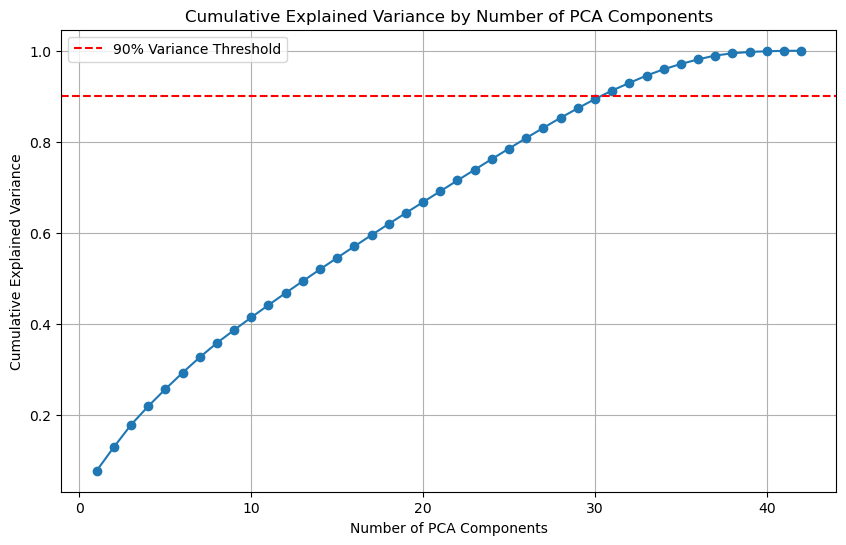

In [15]:
# Find PCA components that explain at least 90% variance
n_components_list = np.arange(1, X_train.shape[1]+1)
cumulative_variances = []
for n in n_components_list:
    pca_temp = PCA(n_components=n, random_state=6657)
    pca_temp.fit(X_train_scaled)
    cumulative_variances.append(np.sum(pca_temp.explained_variance_ratio_))

# # Print the number of compoents and their cumulative variance
# for n, cum_var in zip(n_components_list, cumulative_variances):
#     print(f">>> PCA with {n} components: Cumulative Explained Variance = {cum_var*100:.2f}%")

    
# Plot Cumulative Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(n_components_list, cumulative_variances, marker='o')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance Threshold')
plt.title('Cumulative Explained Variance by Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid()
plt.show()

**Simple Analysis (Observation):**

- PCA Analysis (Complexity Confirmed):
  - The first two principal components only explain ~13% of the variance, explaining why the 2D projection shows significant overlap between classes. This tells us that the dataset is complex and high-dimensional.
  - To capture 90% of the information, we would need approximately 30 components.
  - There is no simple "straight line" that separates the two groups. This partially explains why we needed **Random Forest** to capture the complexity.
- K-Means Clustering (The "Hidden" Structure):
  - **Cluster 2 is the "High Achiever" Group:** Without knowing the income labels, the algorithm successfully identified a distinct group (Cluster 2) where **45%** of individuals are high earners (compared to only ~5-7% in other clusters).
  - Looking at the profiles:
    - **Cluster 1 (Early Career):** Likely represents younger individuals who are just starting out for a few years with the shortest work hours (~37.7 hrs/week), hence the lowest income rate.
    - **Cluster 0 (The Stagnant Middle):** Represents individuals of similar age to Cluster 2 (~43 years old) but with the **lowest education levels** and standard hours (~39 hrs/week), resulting in low income potential despite their seniority.
    - **Cluster 2 (High Achievers):** Represents individuals in their prime working age (~43) who distinguish themselves with the highest education and longest working hours (~44 hrs/week) out of the 3 clusters, capturing more high-income earners.
  - The structure reveals that while **Age** separates the young (Cluster 1), it is the combination of **Education + Hard Work (Hours)** that distinguishes the wealthy (Cluster 2) from the average (Cluster 0).